# Logistic Regression on Tibia Image data

In [97]:
import pandas as pd
import numpy as np

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    accuracy_score, roc_auc_score, recall_score, f1_score, confusion_matrix,ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [99]:
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [100]:
# load preprocessed data
# Load preprocessed features
train_set = pd.read_csv("processed_train_data.csv")
test_set = pd.read_csv("processed_test.csv")
blinded_set = pd.read_csv("processed_blinded.csv")

In [101]:
train_set

,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,CLASS
0,-20.254695,-11.823130,7.716862,-22.192462,11.197826,-4.493449,-8.297601,4.836435,-12.050268,4.323477,...,1.237971,4.141354,0.078479,0.183321,1.915560,-0.200344,-0.082856,0.986281,1.078308,0
1,32.305595,2.902575,13.719270,3.284687,0.318778,-3.328642,-11.057760,-6.648227,5.113819,1.323667,...,-0.620535,1.068192,-0.669716,-0.109740,0.422995,-2.013640,0.134023,1.033398,1.337861,1
2,23.381363,-21.144410,-5.660671,14.253208,-15.846635,1.857529,5.306571,5.460791,-4.488701,-0.488072,...,-0.507881,-1.599731,1.438878,0.470648,1.582101,0.513268,1.034832,-0.877964,1.432206,1
3,19.043432,-25.587721,-13.222623,7.755025,-6.590997,7.207803,7.963237,9.035006,-4.554078,1.242031,...,0.887455,1.168406,1.150717,0.783898,0.823143,0.017743,-0.470604,-1.364536,0.539822,0
4,-23.687445,1.828866,-9.794944,4.210438,-20.735913,11.579998,7.107506,-4.203560,0.861026,1.965857,...,-1.362658,-0.917914,2.580819,0.806721,0.521284,-0.491274,0.255756,-0.690738,-0.209101,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,27.043973,12.709965,-6.176172,-12.037199,13.615935,-11.939834,-7.539671,11.643703,-1.649445,-2.663559,...,1.146871,1.413623,-0.112151,-0.620926,-0.910640,0.578056,-2.000807,-1.206298,-0.807743,0
311,26.222582,-14.252196,19.215742,1.460451,1.047792,-5.374006,-15.226595,-6.820422,-0.065914,2.108265,...,0.178957,-2.024610,-0.261054,1.727103,0.220496,0.736102,0.173338,-0.194116,0.340548,1
312,-36.812220,-1.832858,-4.354634,-4.883522,8.524470,0.794997,20.419363,1.419015,6.076603,13.536463,...,0.168211,0.523303,-0.762268,2.280616,0.700935,0.289251,-0.107174,-1.528718,1.182205,0
313,38.969967,33.209297,22.771808,-5.139838,4.823144,-15.215889,-33.647823,17.329430,-8.474156,4.884447,...,-2.019870,-1.710985,0.257130,1.513025,0.873007,-0.730550,-0.292175,-1.609126,-0.750611,1


In [102]:
# split train_set into X and y variable
X_train = train_set.drop(columns=["CLASS"])
y_train = train_set["CLASS"]

In [103]:
X_test = test_set.drop(columns = ["CLASS"])
y_test = test_set["CLASS"]          

In [104]:
X_blinded = blinded_set

In [105]:
# logistic regression model
log_reg = LogisticRegression(solver='saga', max_iter=1000, class_weight='balanced')

In [106]:
# grid search for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

In [107]:
# use stratiifed cross validation, split into 5 parts
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [108]:
# use grid serch to find best hyper parameter
grid = GridSearchCV(log_reg, param_grid, cv=cv, scoring='accuracy')
grid.fit(X_train, y_train)

C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\User\miniconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=1000, solver='saga'),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [109]:
# best model
best_model = grid.best_estimator_
print("Best hyperparameters:", grid.best_params_)
print("Best AUROC (CV):", grid.best_score_)

Best hyperparameters: {'C': 0.1, 'penalty': 'l1'}
Best AUROC (CV): 0.6507936507936508


### Evalute model performance on Test data

In [110]:
# get predicted probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# apply custom threshold
threshold = 0.5
y_pred = (y_probs >= threshold).astype(int)

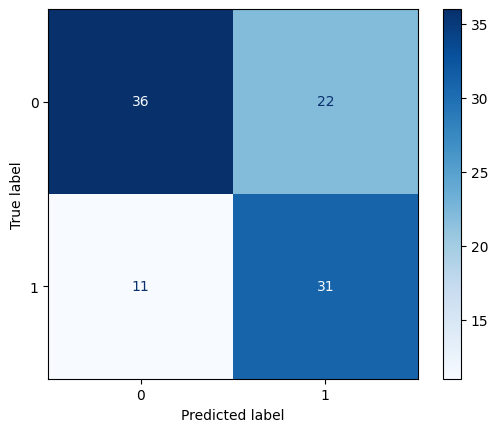

In [111]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [112]:
# Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUROC:", roc_auc_score(y_test, y_probs))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))
print("Specificity:", tn / (tn + fp))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.67
AUROC: 0.7114121510673235
Sensitivity (Recall): 0.7380952380952381
Specificity: 0.6206896551724138
F1 Score: 0.6526315789473685


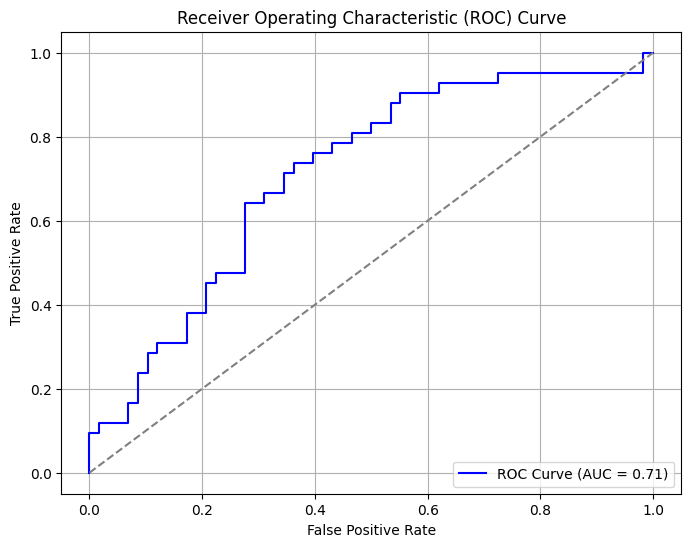

In [113]:
# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUROC
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Evaluete model performance on blinded data

In [114]:
# get predicted probabilities
y_probs_blinded = best_model.predict_proba(X_blinded)[:, 1]

# apply custom threshold
y_pred_blinded = (y_probs_blinded >= threshold).astype(int)

In [115]:
y_pred_blinded

array([0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0])

# Random Forest Classification

In [153]:
# initialize base model
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

In [154]:
# define hyper parameter
param_grid_rf = {
    'n_estimators': [100,200],       # Number of trees
    'max_depth': [3,4],       # Depth of trees
    'min_samples_split': [6,7],      # Minimum samples to split a node
    'min_samples_leaf': [1,2],        # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2'],     # Number of features to consider when looking for the best split
    'bootstrap': [True, False]            # Whether bootstrap samples are used
}

In [155]:
# cv for random forest
cv_rf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [156]:
# hyper parameter tuning with RansomizedSearchCV
search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid_rf,
    scoring='roc_auc',       # Metric to optimize
    n_iter=20,               # Number of combinations to try
    cv=cv_rf,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

In [157]:
# fit search on training data
search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 4],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [6, 7],
                                        'n_estimators': [100, 200]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [158]:
# best estimator
best_rf = search_rf.best_estimator_
print("Best Hyperparameters:", search_rf.best_params_)
print("Best AUROC (CV):", search_rf.best_score_)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 3, 'bootstrap': True}
Best AUROC (CV): 0.6596491228070177


In [237]:
# make prediction on test data
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]  
threshold = 0.45
y_pred_rf = (y_prob_rf >= threshold).astype(int)

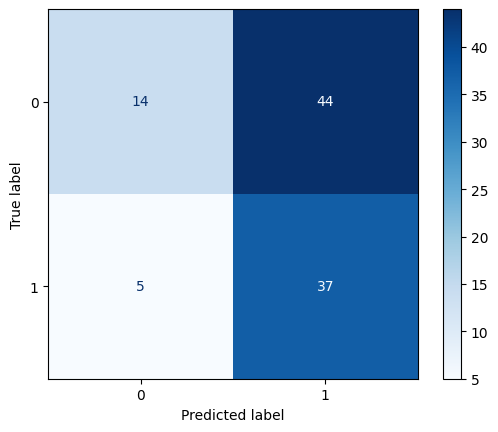

In [238]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

In [241]:
# Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("AUROC:", roc_auc_score(y_test, y_prob_rf))
print("Sensitivity (Recall):", recall_score(y_test, y_pred_rf))
print("Specificity:", tn / (tn + fp))
print("F1 Score:", f1_score(y_test, y_pred_rf))

Accuracy: 0.51
AUROC: 0.6231527093596059
Sensitivity (Recall): 0.8809523809523809
Specificity: 0.2413793103448276
F1 Score: 0.6016260162601627


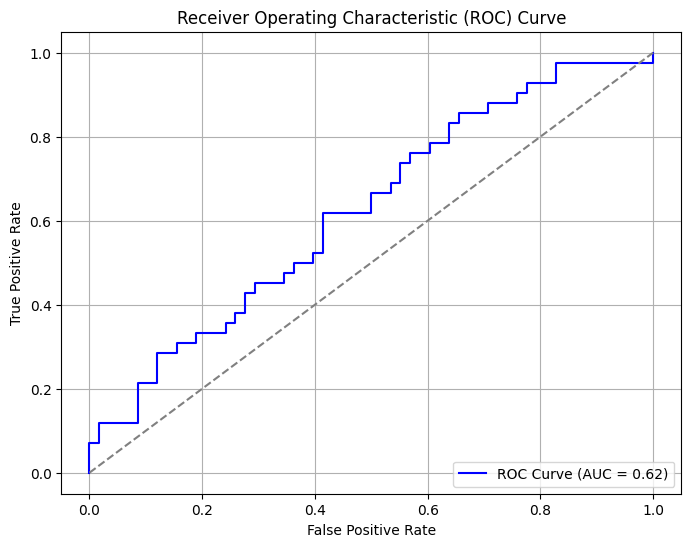

In [240]:
# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob_rf)

# Compute AUROC
auc_score = roc_auc_score(y_test, y_prob_rf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [163]:
# get predicted probabilities
y_probs_blinded = best_rf.predict_proba(X_blinded)[:, 1]

# apply custom threshold
y_pred_blinded = (y_probs_blinded >= threshold).astype(int)

In [164]:
y_pred_blinded

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Create Ensemble classifier of Logistic model , randomforest and lgbm Classifier

In [258]:
# define best model for lgb 
lgb = LGBMClassifier(objective='binary', class_weight='balanced', random_state=42)

In [259]:
param_grid_lgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.05],
    'max_depth': [3, 4],
    'num_leaves': [7, 15],
    'min_child_samples': [5, 10],
    'subsample': [1.0],               # no row sampling
    'colsample_bytree': [1.0],        # no column sampling
    'reg_alpha': [0.01, 0.05],        # small L1
    'reg_lambda': [0.01, 0.1]         # small L2
}


In [261]:
# cross-validation for lgb
cv_lgb = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [262]:
# run random search
search_lgb = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_grid_lgb,
    n_iter=30,
    scoring='roc_auc',
    cv=cv_lgb,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [263]:
# fit train daa
search_lgb.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Info] Number of positive: 124, number of negative: 191
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 9646
[LightGBM] [Info] Number of data points in the train set: 315, number of used features: 91
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=LGBMClassifier(class_weight='balanced',
                                            objective='binary',
                                            random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [1.0],
                                        'learning_rate': [0.01, 0.05],
                                        'max_depth': [3, 4],
                                        'min_child_samples': [5, 10],
                                        'n_estimators': [50, 100],
                                        'num_leaves': [7, 15],
                                        'reg_alpha': [0.01, 0.05],
                                        'reg_lambda': [0.01, 0.1],
                                        'subsample': [1.0]},
                   random_state=42, scoring='roc_auc', verbose=1)

In [264]:
# print best results
print("Best Parameters:", search_xgb.best_params_)
print("Best Cross-Validated AUC:", search_xgb.best_score_)

Best Parameters: {'subsample': 0.7, 'reg_lambda': 20, 'reg_alpha': 5, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.05, 'colsample_bytree': 0.5}
Best Cross-Validated AUC: 0.6631808367071524


In [265]:
# stacking classifier
stack = StackingClassifier(
    estimators=[
        ('lr', best_model),
        ('rf', best_rf),
        ('lgb', search_lgb)
    ],
    final_estimator=LogisticRegression(),
    cv=10,
    n_jobs=-1
)

In [247]:
# train stack_model
stack.fit(X_train, y_train)

StackingClassifier(cv=10,
                   estimators=[('lr',
                                LogisticRegression(C=0.1,
                                                   class_weight='balanced',
                                                   max_iter=1000, penalty='l1',
                                                   solver='saga')),
                               ('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       max_depth=3,
                                                       max_features='log2',
                                                       min_samples_leaf=2,
                                                       min_samples_split=6,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('lgb',
                                RandomizedSearchCV(cv=StratifiedKFold(n_splits=5,...
                                                   param_distributions={'colsample_bytree': [0.6,
                                                                                             0.8,
                                                                                             1.0],
                                                                        'learning_rate': [0.01,
                                                                                          0.05,
                                                                                          0.1],
                                                                        'max_depth': [4,
                                                                                      6,
                                                                                      8,
                                                                                      10,
                                                                                      -1],
                                                                        'min_child_samples': [10,
                                                                                              20,
                                                                                              30],
                                                                        'n_estimators': [50,
                                                                                         100,
                                                                                         150,
                                                                                         200],
                                                                        'num_leaves': [15,
                                                                                       31,
                                                                                       63],
                                                                        'reg_alpha': [0,
                                                                                      0.1,
                                                                                      0.5],
                                                                        'reg_lambda': [0,
                                                                                       0.1,
                                                                                       0.5],
                                                                        'subsample': [0.6,
                                                                                      0.8,
                                                                                      1.0]},
                                                   random_state=42,
                                                   scoring='roc_auc',
                                  

In [248]:
# predict on test data
y_pred_stack = stack.predict(X_test)
y_prob_stack = stack.predict_proba(X_test)[:, 1]
threshold = 0.45
y_pred_stack = (y_prob_stack >= threshold).astype(int)

In [249]:
# Evaluation
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_stack).ravel()
print("Accuracy:", accuracy_score(y_test, y_pred_stack))
print("AUROC:", roc_auc_score(y_test, y_prob_stack))
print("Sensitivity (Recall):", recall_score(y_test, y_pred_stack))
print("Specificity:", tn / (tn + fp))
print("F1 Score:", f1_score(y_test, y_pred_stack))

Accuracy: 0.69
AUROC: 0.6892446633825944
Sensitivity (Recall): 0.5952380952380952
Specificity: 0.7586206896551724
F1 Score: 0.6172839506172839


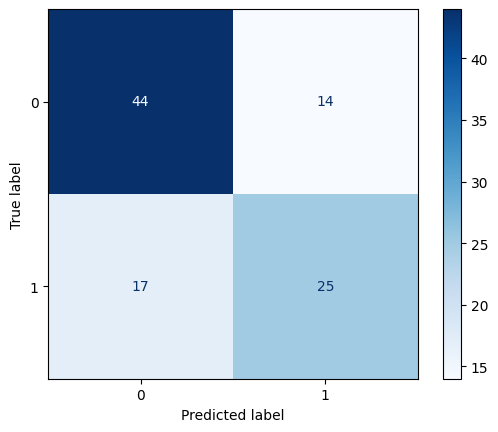

In [250]:
cm = confusion_matrix(y_test, y_pred_stack)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')

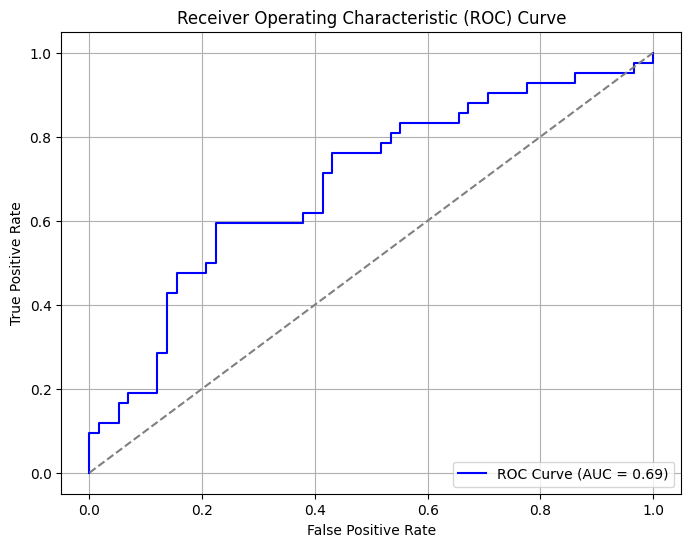

In [251]:
# Compute False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_prob_stack)

# Compute AUROC
auc_score = roc_auc_score(y_test, y_prob_stack)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()